In [35]:
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from keras.models import Sequential
from keras.datasets import mnist

In [36]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [37]:
x_train = tensorflow.expand_dims(x_train, -1)
x_test = tensorflow.expand_dims(x_test, -1)

In [38]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [39]:
y_train.shape

(60000,)

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'tanh', padding = 'valid', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'tanh', padding = 'valid'))
model.add(AveragePooling2D(pool_size = (2,2), strides = 2))

model.add(Flatten())

model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_20            │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_21            │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 120)            │       192,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,950 (866.99 KB)

 Trainable params: 221,950 (866.99 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [49]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9361 - loss: 0.2211 - val_accuracy: 0.9787 - val_loss: 0.0661
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9822 - val_loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9806 - val_loss: 0.0663
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9868 - loss: 0.0430 - val_accuracy: 0.9847 - val_loss: 0.0499
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9846 - val_loss: 0.0464
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9884 - loss: 0.0363 - val_accuracy: 0.9875 - val_loss: 0.0395
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9855 - val_loss: 0.0422
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.03

In [50]:
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9888 - loss: 0.0350
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.0639
0.984499990940094


Using ReLu

In [44]:
models = Sequential()

models.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
models.add(AveragePooling2D(pool_size = (2,2), strides = 2))
models.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
models.add(AveragePooling2D(pool_size = (2,2), strides = 2))

models.add(Flatten())

models.add(Dense(120, activation = 'relu'))
models.add(Dense(84, activation = 'relu'))
models.add(Dense(10, activation = 'softmax'))

models.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_18            │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_19            │ (None, 5, 5, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 120)            │       192,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,950 (866.99 KB)

 Trainable params: 221,950 (866.99 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
models.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
w = models.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10 )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9175 - loss: 0.3494 - val_accuracy: 0.9853 - val_loss: 0.0517
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9854 - val_loss: 0.0478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9889 - val_loss: 0.0388
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9844 - val_loss: 0.0554
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9856 - val_loss: 0.0497
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9873 - val_loss: 0.0440
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9951 - loss: 0.0161 - val_accuracy: 0.9889 - val_loss: 0.0417
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9964 - loss: 0.0120

In [52]:
tests_acc = models.evaluate(x_test, y_test)
print(tests_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0614
[0.05320456996560097, 0.9884999990463257]


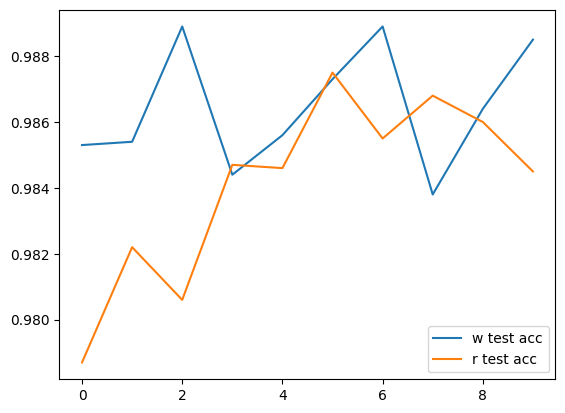

In [59]:
plt.plot(w.history['val_accuracy'], label = 'w test acc')
plt.plot(r.history['val_accuracy'], label = 'r test acc')
plt.legend()
plt.show()